## 获得前n个主成分

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

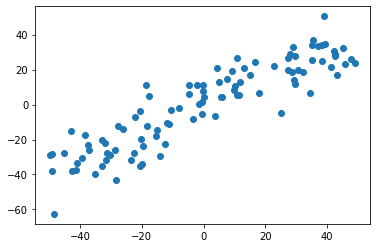

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)
X = demean(X)
plt.scatter(X[:,0], X[:,1])
plt.show()


In [14]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):

    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w


initial_w = np.random.random(X.shape[1])
eta = 0.01
w1 = first_component(X, initial_w, eta)
w1


array([0.77370654, 0.63354415])

[-11.24152183 -11.08460088]
[-0.63354097  0.77370914]


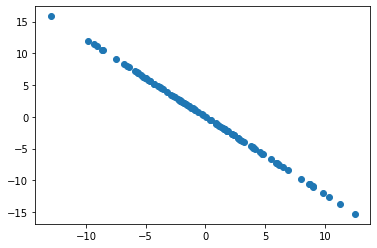

4.104446844843679e-06

In [15]:
print(X[0])
X2 = np.empty(X.shape)
for i in range(X.shape[0]):
    X2[i] = X[i] - X[i].dot(w1)*w1

plt.scatter(X2[:,0], X2[:,1])
plt.show()

initial_w = np.random.random(X.shape[1])
eta = 0.01
w2 = first_component(X2, initial_w, eta)
print(w2)

w1.dot(w2)


In [29]:
X2 = X - X.dot(w1)* w1
X2

[-1.57202230e+01  4.04068459e+01  4.40388761e+01  5.05972455e+01
  6.98671977e+00 -2.06013319e+01  4.39820388e-02 -4.78155733e+01
 -1.59411703e+01 -1.10286084e+00 -3.69042424e+01 -4.97400247e+01
 -3.48672393e+01 -2.33696404e+01 -1.07106441e+01 -4.52621135e+01
 -6.20315385e+01  5.11766290e+01 -1.81669164e+01  1.92499958e+01
 -2.16165486e+01  2.34027646e+01  4.32086199e+01 -2.40493032e+01
 -4.16763931e+01  1.20323969e+01 -2.90377337e+01  3.66189406e+01
  3.39154843e+01  7.33518816e+00 -4.45965052e+01 -7.31450319e+00
  5.09872755e+01  1.51455980e+01 -4.09750977e+01 -3.81825163e+01
  1.24105016e+01  1.71897858e+01 -4.26711042e+01 -5.59172735e+01
 -3.02026010e+01  3.48416858e+00  6.22154948e+01  4.86548365e+01
  5.22629499e+01 -2.96923642e+01  3.98961628e+01 -9.95744546e+00
 -2.18645360e+01 -5.28285490e+01  5.28871237e+01 -3.83556623e+01
  4.96841686e+01  3.09154443e+01 -5.57508561e+01  5.37242132e+00
 -7.70627301e+01  1.20602492e+01  1.46796332e+01  5.02783436e+01
 -1.50424874e+00 -3.71049

ValueError: operands could not be broadcast together with shapes (100,) (2,) 